In [1]:
# Importing Relevant Libraries
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import pylab
import collections
import pymongo
import psycopg2
import paho.mqtt.client as mqtt
import seaborn as sns
from IPython import display
from pandas import datetime
from datetime import timedelta
from pymongo import MongoClient
from scipy import stats

import plotly.graph_objects as go
import plotly as py

py.offline.init_notebook_mode(connected=True)

In [2]:
# Set up MongoDB Client
client_mqtt = mqtt.Client()

# Set up NodeMCU Client
client_mongo = MongoClient('192.168.1.5')
temp_database = client_mongo['temp_collect']
data_1=temp_database['Temperature_1']
data_2=temp_database['Temperature_2']

## Zone 1

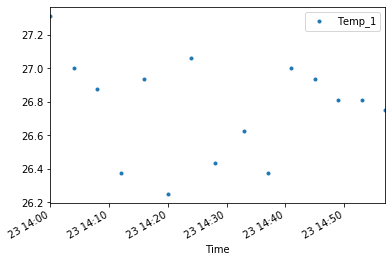

In [18]:
#Time : 2pm - 3pm , AC Temperature : 26, Date : 18/7/19
date_time=[]
tmp_1=[]
tmp_2=[]
#tmp_3=[]
avg=[]
#specifying every n'th minute
time=4
#counter
c=time
for obj in data_1.find():
    time_h=(obj['Date-Time'])
   
    #if("15:" in time_h or "15:0" in time_h):
    if("07/23/2019 14:" in time_h):
        if(c==time):
            date_time.append(datetime.strptime(obj['Date-Time'],'%m/%d/%Y %H:%M'))
            tmp_1.append(float(obj['tmp_1']))
            tmp_2.append(float(obj['tmp_2']))
            #tmp_3.append(float(obj['tmp_3']))
            #avg.append((float(obj['tmp_1'])+float(obj['tmp_2'])+float(obj['tmp_3']))/3)
            avg.append((float(obj['tmp_1'])+float(obj['tmp_2']))/2)
            c=0
        c=c+1

avg_1=avg
d_1 = {'Time':date_time,'Temp_1':tmp_1,'Temp_2':tmp_2,'Avg':avg}
data_time_1=pd.DataFrame(d_1)
data_time_1.plot(x='Time', y='Temp_1', style=".")




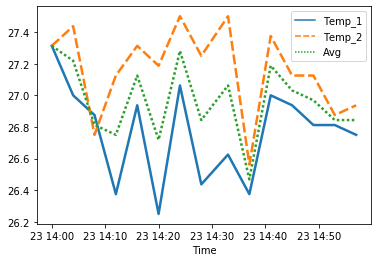

In [19]:
data_time_1=data_time_1.set_index('Time')
sns.lineplot(palette="tab10", linewidth=2.5,data=data_time_1)

## Zone 2

In [22]:
#Time : 2pm - 3pm , AC Temperature : 26, Date : 18/7/19
date_time=[]
tmp_1=[]
tmp_2=[]
#tmp_3=[]
avg=[]
#specifying every n'th minute
time=4
#counter
c=time
for obj in data_2.find():
    time_h=(obj['Date-Time'])
   
    #if("15:" in time_h or "15:0" in time_h):
    if("07/23/2019 14:" in time_h ):
        if(c==time):
            date_time.append(datetime.strptime(obj['Date-Time'],'%m/%d/%Y %H:%M'))
            tmp_1.append(float(obj['tmp_1']))
            tmp_2.append(float(obj['tmp_2']))
            #tmp_3.append(float(obj['tmp_3']))
            #avg.append((float(obj['tmp_1'])+float(obj['tmp_2'])+float(obj['tmp_3']))/3)
            avg.append((float(obj['tmp_1'])+float(obj['tmp_2']))/2)
            c=0
        c=c+1


d_1 = {'Time':date_time,'Temp_1':tmp_1,'Temp_2':tmp_2,'Avg':avg}
avg_2=avg
data_time_2=pd.DataFrame(d_1)

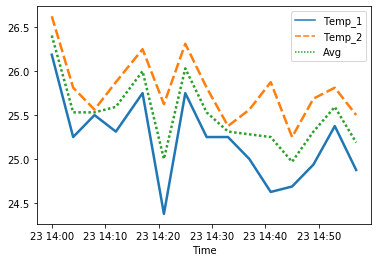

In [23]:
data_time_2=data_time_2.set_index('Time')
sns.lineplot(palette="tab10", linewidth=2.5,data=data_time_2)

In [33]:
data_time_2.columns

Index(['Temp_1', 'Temp_2', 'Avg'], dtype='object')

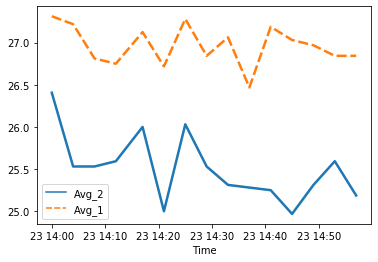

In [24]:
d3={'Time':date_time,'Avg_2':avg_2,'Avg_1':avg_1}
data_time_join=pd.DataFrame(d3)
data_time_join=data_time_join.set_index('Time')
sns.lineplot(palette="tab10", linewidth=2.5,data=data_time_join)

In [25]:
from scipy.stats.stats import pearsonr 
print (pearsonr(avg_1, avg_2))

(0.5245358343755857, 0.04470666900262236)


In [10]:
import statsmodels.tsa.stattools as ts 
result=ts.coint(data_time_join['Avg_1'],data_time_join['Avg_2'])
result
#t-test,pvalue,confidence level critical value
#null hypo - no cointegration

(-3.2995031750050337,
 0.054803039885984284,
 array([-4.09523227, -3.44350479, -3.1183827 ]))

In [85]:
data_time['MA_1']=data_time.Avg.rolling(window=20).mean()

In [78]:
data_time.head()

,Temp_1,Temp_2,Temp_3,Avg,MA_1
Time,,,,,
2019-07-19 12:08:00,24.125,24.375,24.687,24.395667,NaN
2019-07-19 12:09:00,24.562,24.875,24.375,24.604000,NaN
2019-07-19 12:10:00,24.750,25.250,25.250,25.083333,NaN
2019-07-19 12:12:00,24.687,24.750,25.125,24.854000,NaN
2019-07-19 12:13:00,24.250,23.563,24.188,24.000333,NaN


In [79]:
#plot correlation of temperatures with AVG

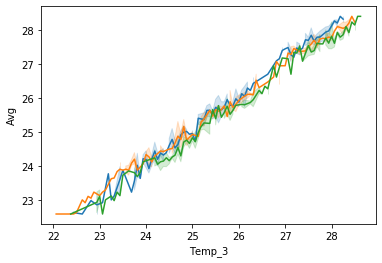

In [70]:
sns.lineplot(x="Temp_1", y="Avg",data=data_time)
sns.lineplot(x="Temp_2", y="Avg",data=data_time)
sns.lineplot(x="Temp_3", y="Avg",data=data_time)


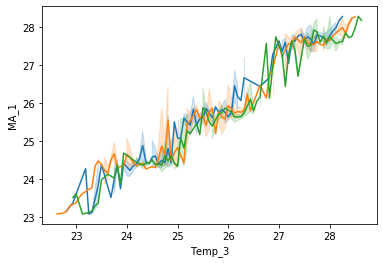

In [67]:
sns.lineplot(x="Temp_1", y="MA_1",data=data_time)
sns.lineplot(x="Temp_2", y="MA_1",data=data_time)
sns.lineplot(x="Temp_3", y="MA_1",data=data_time)


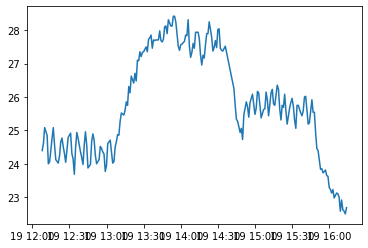

In [86]:
sns.lineplot(data=data_time['Avg'])

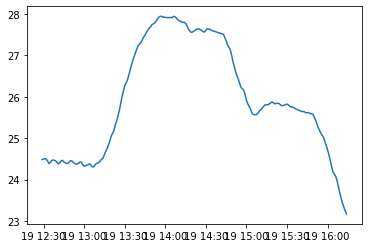

In [87]:
sns.lineplot(data=data_time['MA_1'])

In [88]:
from scipy.stats.stats import pearsonr 
data_time=data_time.dropna()
print (pearsonr(data_time['MA_1'], data_time['Avg']))

(0.8800909112060482, 5.391591762417557e-65)


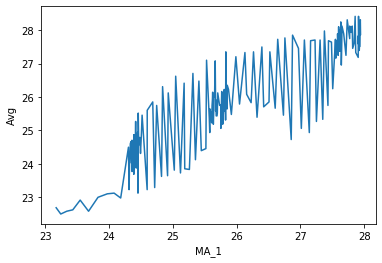

In [89]:
sns.lineplot(x="MA_1", y="Avg",data=data_time)

In [48]:
data_time.head()

,Temp_1,Temp_2,Temp_3,Avg,MA
Time,,,,,
2019-07-19 12:08:00,24.125,24.375,24.687,24.395667,NaN
2019-07-19 12:12:00,24.687,24.750,25.125,24.854000,NaN
2019-07-19 12:15:00,24.250,24.312,24.625,24.395667,24.548444
2019-07-19 12:18:00,24.562,24.062,25.062,24.562000,24.603889
2019-07-19 12:22:00,24.125,24.000,24.562,24.229000,24.395556


In [1]:
window = 3
lag = 1

In [11]:
# let's modify a dataframe to hold the start time of the window and the end time 
# to hold our time stamps (for a particular average)
# mean of the 30 temperature along with the degree of freedom that we have and return the dataframe 
def moving_average(dataframe):
    win_start_time = collections.deque()
    win_end_time = collections.deque()
    avg = collections.deque()
    for iloc in range(0,len(dataframe.index.values),lag):
        win_start_time.append(dataframe.index.values[iloc:iloc+window].min())
        win_end_time.append(dataframe.index.values[iloc:iloc+window].max()) 
        sample = np.array(dataframe['Avg'].iloc[iloc:iloc+window].values, dtype=np.float64)
        avg.append(np.nanmean(sample))
    data = {'Start time' : list(win_start_time), 'End time': list(win_end_time), 'Average' : list(avg)}
    
    mov_avg_df = pd.DataFrame(data)
    return mov_avg_df 
mov_avg_df = moving_average(data_time) 
print(mov_avg_df)

            Start time            End time    Average
0  2019-07-18 16:00:00 2019-07-18 16:06:00  24.361000
1  2019-07-18 16:03:00 2019-07-18 16:10:00  24.423667
2  2019-07-18 16:06:00 2019-07-18 16:13:00  24.416556
3  2019-07-18 16:10:00 2019-07-18 16:16:00  24.326222
4  2019-07-18 16:13:00 2019-07-18 16:20:00  24.513556
5  2019-07-18 16:16:00 2019-07-18 16:23:00  24.367889
6  2019-07-18 16:20:00 2019-07-18 16:26:00  24.749778
7  2019-07-18 16:23:00 2019-07-18 16:29:00  24.583111
8  2019-07-18 16:26:00 2019-07-18 16:33:00  24.645444
9  2019-07-18 16:29:00 2019-07-18 16:36:00  24.485889
10 2019-07-18 16:33:00 2019-07-18 16:40:00  24.604000
11 2019-07-18 16:36:00 2019-07-18 16:43:00  24.652778
12 2019-07-18 16:40:00 2019-07-18 16:46:00  24.736111
13 2019-07-18 16:43:00 2019-07-18 16:50:00  24.708222
14 2019-07-18 16:46:00 2019-07-18 16:53:00  24.548556
15 2019-07-18 16:50:00 2019-07-18 16:56:00  24.541667
16 2019-07-18 16:53:00 2019-07-19 16:00:00  24.055667
17 2019-07-18 16:56:00 2019-